# Common data problems

In this lesson, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

In [ ]:
# Import the pandas library as pd
import pandas as pd

ride_sharing = pd.read_csv('ride_sharing_new.csv')

In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [ ]:
ride_sharing.shape

(25760, 10)

In [ ]:
# Summary Statiscs
ride_sharing.describe()

,Unnamed: 0,station_A_id,station_B_id,bike_id,user_type,user_birth_year
count,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000
mean,12879.500000,31.023602,89.558579,4107.621467,2.008385,1983.054969
std,7436.415803,26.409263,105.144103,1576.315767,0.704541,10.010992
min,0.000000,3.000000,3.000000,11.000000,1.000000,1901.000000
25%,6439.750000,15.000000,21.000000,3106.000000,2.000000,1978.000000
50%,12879.500000,21.000000,58.000000,4821.000000,2.000000,1985.000000
75%,19319.250000,67.000000,93.000000,5257.000000,3.000000,1990.000000
max,25759.000000,81.000000,383.000000,6638.000000,3.000000,2001.000000


In [ ]:
ride_sharing.user_gender.describe()

,user_gender
count,25760
unique,3
top,Male
freq,19382


## Numeric data or ... ?

In [ ]:
# Print the information of ride_sharing
print(ride_sharing.info())

In [ ]:
ride_sharing.shape

(25760, 11)

## Summing strings and concatenating numbers

In [ ]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [ ]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2


In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
dtypes: category(1), int64(6), object(4)
memory usage: 2.0+ MB


In [ ]:
ride_sharing.user_type.describe()

,user_type
count,25760.000000
mean,2.008385
std,0.704541
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
ride_sharing.user_type_cat.describe()

,user_type_cat
count,25760
unique,3
top,2
freq,12972


In [ ]:
ride_sharing.shape

(25760, 11)

In [ ]:
ride_sharing.user_type.describe()

In [ ]:
ride_sharing['user_type']=ride_sharing['user_type'].astype('int')

In [ ]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

In [ ]:
# Print new summary statistics
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2


In [ ]:
ride_sharing.duration.describe()

,duration
count,25760
unique,172
top,7 minutes
freq,2322


In [ ]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11


In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
dtypes: category(1), int64(6), object(5)
memory usage: 2.2+ MB


## Duration constraints

In [ ]:
# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11


In [ ]:
# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
 12  duration_time    25760 non-null  int64   
dtypes: category(1), int64(7), object(5)
memory usage: 2.4+ MB


In [ ]:
ride_sharing.head()

In [ ]:
ride_sharing.info()

In [ ]:
ride_sharing.duration.describe()

,duration
count,25760
unique,172
top,7 minutes
freq,2322


In [ ]:
ride_sharing.duration_trim.describe()

,duration_trim
count,25760
unique,172
top,7
freq,2322


In [ ]:
ride_sharing.duration_time.describe()

,duration_time
count,25760.000000
mean,11.389053
std,23.500516
min,1.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,1372.000000


In [ ]:
ride_sharing.describe()

,Unnamed: 0,station_A_id,station_B_id,bike_id,user_type,user_birth_year,duration_time
count,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000
mean,12879.500000,31.023602,89.558579,4107.621467,2.008385,1983.054969,11.389053
std,7436.415803,26.409263,105.144103,1576.315767,0.704541,10.010992,23.500516
min,0.000000,3.000000,3.000000,11.000000,1.000000,1901.000000,1.000000
25%,6439.750000,15.000000,21.000000,3106.000000,2.000000,1978.000000,6.000000
50%,12879.500000,21.000000,58.000000,4821.000000,2.000000,1985.000000,9.000000
75%,19319.250000,67.000000,93.000000,5257.000000,3.000000,1990.000000,13.000000
max,25759.000000,81.000000,383.000000,6638.000000,3.000000,2001.000000,1372.000000


In [ ]:
# Print formed columns and calculate average ride duration
duration_df=ride_sharing[['duration','duration_trim','duration_time']]
duration_df

,duration,duration_trim,duration_time
0,12 minutes,12,12
1,24 minutes,24,24
2,8 minutes,8,8
3,4 minutes,4,4
4,11 minutes,11,11
...,...,...,...
25755,11 minutes,11,11
25756,10 minutes,10,10
25757,14 minutes,14,14
25758,14 minutes,14,14


In [ ]:
duration_df.duration_time.mean()

11.389052795031056

In [ ]:
duration_df.describe()

,duration_time
count,25760.000000
mean,11.389053
std,23.500516
min,1.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,1372.000000


In [ ]:
# Convert duration to integer
ride_sharing['duration_trim'] = ride_sharing['duration_trim'].astype('int')

In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  int64   
 12  duration_time    25760 non-null  int64   
dtypes: category(1), int64(8), object(4)
memory usage: 2.4+ MB


In [ ]:
ride_sharing.duration_trim.describe()

,duration_trim
count,25760.000000
mean,11.389053
std,23.500516
min,1.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,1372.000000


In [ ]:
print(ride_sharing['duration_trim'].mean())

11.389052795031056


In [ ]:
# Set all values above 27 to 27
dfx=ride_sharing.loc[ride_sharing['user_gender'] =='Female']

In [ ]:
dfx

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
8,8,21 minutes,81,Berry St at 4th St,16,Steuart St at Market St,2124,1,1982,Female
13,13,187 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,355,23rd St at Tennessee St,674,2,1987,Female
18,18,16 minutes,16,Steuart St at Market St,42,San Francisco City Hall (Polk St at Grove St),5000,2,2000,Female
25,25,3 minutes,81,Berry St at 4th St,93,4th St at Mission Bay Blvd S,2409,3,1990,Female
30,30,6 minutes,21,Montgomery St BART Station (Market St at 2nd St),323,Broadway at Kearny,5218,1,1988,Female
...,...,...,...,...,...,...,...,...,...,...
25716,25716,4 minutes,81,Berry St at 4th St,104,4th St at 16th St,4570,2,1998,Female
25726,25726,13 minutes,3,Powell St BART Station (Market St at 4th St),365,Turk St at Fillmore St,2609,1,1968,Female
25732,25732,24 minutes,5,Powell St BART Station (Market St at 5th St),285,Webster St at O'Farrell St,5404,3,1997,Female
25733,25733,21 minutes,5,Powell St BART Station (Market St at 5th St),285,Webster St at O'Farrell St,5159,3,1988,Female


In [ ]:
ride_sharing.head()

In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [ ]:
ride_sharing.duration.describe()

,duration
count,25760
unique,172
top,7 minutes
freq,2322


In [ ]:
# Reconvert duration back to categorical
ride_sharing['duration'] = ride_sharing['duration'].astype('category')

In [ ]:
# Print duration description
print(ride_sharing['duration'].head())

0    12 minutes
1    24 minutes
2     8 minutes
3     4 minutes
4    11 minutes
Name: duration, dtype: category
Categories (172, object): ['1 minutes', '10 minutes', '100 minutes', '102 minutes', ...,
                           '94 minutes', '95 minutes', '96 minutes', '99 minutes']


In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


## Back to the future

In [ ]:
ride_sharing.user_birth_year

,user_birth_year
0,1959
1,1965
2,1993
3,1979
4,1994
...,...
25755,2000
25756,1998
25757,1995
25758,1995


In [ ]:
import datetime as dt
import pandas as pd

# Convert ride_date to datetime
ride_sharing['user_birth_year'] = pd.to_datetime(ride_sharing['user_birth_year'])

In [ ]:
ride_sharing.user_birth_year

,user_birth_year
0,1970-01-01 00:00:00.000001959
1,1970-01-01 00:00:00.000001965
2,1970-01-01 00:00:00.000001993
3,1970-01-01 00:00:00.000001979
4,1970-01-01 00:00:00.000001994
...,...
25755,1970-01-01 00:00:00.000002000
25756,1970-01-01 00:00:00.000001998
25757,1970-01-01 00:00:00.000001995
25758,1970-01-01 00:00:00.000001995


In [ ]:
# Save today's date
today = pd.Timestamp(dt.date.today()) # Change today to Timestamp object

In [ ]:
today

Timestamp('2024-10-21 00:00:00')

In [ ]:
# Set all in the future to today's date
ride_sharing.loc[ride_sharing['user_birth_year'] < today, 'user_birth_year'] = today

In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,2024-10-21,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,2024-10-21,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,2024-10-21,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,2024-10-21,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,2024-10-21,Male


In [ ]:
# Print maximum of ride_dt column
print(ride_sharing['user_birth_year'].max())

1970-01-01 00:00:00.000002001


In [ ]:
ride_sharing.head()

## Finding duplicates

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='bike_id', keep=False)

In [ ]:
duplicates

,0
0,True
1,True
2,True
3,True
4,True
...,...
25755,True
25756,True
25757,True
25758,True


In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,2024-10-21,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,2024-10-21,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,2024-10-21,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,2024-10-21,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,2024-10-21,Male


In [ ]:
# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

In [ ]:
duplicated_rides.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
3638,3638,12 minutes,22,Howard St at Beale St,350,8th St at Brannan St,11,1,2024-10-21,Female
6088,6088,5 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,63,Bryant St at 6th St,11,2,2024-10-21,Male
10857,10857,4 minutes,3,Powell St BART Station (Market St at 4th St),47,4th St at Harrison St,11,1,2024-10-21,Male
10045,10045,13 minutes,3,Powell St BART Station (Market St at 4th St),112,Harrison St at 17th St,27,3,2024-10-21,Male
16104,16104,10 minutes,22,Howard St at Beale St,30,San Francisco Caltrain (Townsend St at 4th St),27,2,2024-10-21,Male


In [ ]:
# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id    duration user_birth_year
3638        11  12 minutes      2024-10-21
6088        11   5 minutes      2024-10-21
10857       11   4 minutes      2024-10-21
10045       27  13 minutes      2024-10-21
16104       27  10 minutes      2024-10-21
...        ...         ...             ...
8812      6638  10 minutes      2024-10-21
6815      6638   5 minutes      2024-10-21
8456      6638   7 minutes      2024-10-21
8300      6638   6 minutes      2024-10-21
8380      6638   8 minutes      2024-10-21

[25717 rows x 3 columns]


## Treating duplicates

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

In [ ]:
ride_dup.head()

In [ ]:
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_trim': 'mean'}

In [ ]:
statistics

In [ ]:
# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

In [ ]:
ride_unique.head()

In [ ]:
# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

In [ ]:
# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

In [ ]:
duplicated_rides.head()

# **Text and categorical data problems**

Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
airlines = pd.read_csv('airlines_final.csv')

In [ ]:
# Examine the head of the DataFrame
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
airlines.shape

(2477, 13)

## Finding consistency

In [ ]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



## Inconsistent categories

In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()

In [ ]:
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:

airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [ ]:
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
#print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Hub' 'Small' 'Medium' 'Large']


In [ ]:
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
airlines.shape

(2477, 13)

## Remapping categories

In [ ]:
# Create ranges for categories
import numpy as np
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']


In [ ]:
label_names

['short', 'medium', 'long']

In [ ]:
# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges,
                                labels = label_names)

In [ ]:
airlines.tail(10)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type
2467,2799,2399,Wednesday,UNITED INTL,BEIJING,asia,Hub,Gates 91-102,2018-12-31,195.0,Clean,Neutral,Very satisfied,long
2468,2800,1942,Tuesday,UNITED,BOSTON,east us,Large,Gates 70-90,2018-12-31,145.0,Somewhat clean,Somewhat safe,Somewhat satsified,medium
2469,2801,2130,Thursday,CATHAY PACIFIC,HONG KONG,asia,Hub,Gates 1-12,2018-12-31,380.0,Somewhat clean,Somewhat safe,Somewhat satsified,long
2470,2802,394,Friday,ALASKA,LOS ANGELES,west us,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied,medium
2471,2803,2888,Wednesday,UNITED,AUSTIN,midwest us,Medium,Gates 70-90,2018-12-31,60.0,Somewhat clean,Somewhat unsafe,Somewhat satsified,short
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,east us,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified,long
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied,medium
2474,2806,2684,Friday,UNITED,ORLANDO,east us,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied,medium
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied,medium
2476,2808,2162,Saturday,CHINA EASTERN,QINGDAO,asia,Large,Gates 1-12,2018-12-31,220.0,Clean,Very safe,Somewhat satsified,long


In [ ]:
df=airlines[['dest_region', 'wait_type', 'airline']]
df

,dest_region,wait_type,airline
0,asia,medium,UNITED INTL
1,canada/mexico,medium,ALASKA
2,west us,medium,DELTA
3,west us,long,SOUTHWEST
4,east us,long,AMERICAN
...,...,...,...
2472,east us,long,ALASKA
2473,west us,medium,SOUTHWEST
2474,east us,medium,UNITED
2475,west us,medium,JETBLUE


In [ ]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 'Thursday': 'weekday', 'Friday': 'weekday',
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [ ]:
airlines.head(10)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday
5,5,634,Thursday,ALASKA,NEWARK,east us,Hub,Gates 50-59,2018-12-31,140.0,Somewhat clean,Very safe,Very satisfied,medium,weekday
6,6,2578,Saturday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,63.0,Clean,Very safe,Somewhat satsified,medium,weekend
7,8,2592,Saturday,AEROMEXICO,MEXICO CITY,canada/mexico,Hub,Gates 1-12,2018-12-31,215.0,Somewhat clean,Very safe,Neutral,long,weekend
8,9,919,Friday,AIR CANADA,TORONTO,canada/mexico,Hub,Gates 91-102,2018-12-31,70.0,Somewhat clean,Somewhat safe,Somewhat satsified,medium,weekday
9,10,3028,Tuesday,UNITED,PORTLAND,west us,Medium,Gates 70-90,2018-12-31,180.0,Average,Very safe,Neutral,medium,weekday


## Replacing character strings

In [ ]:
survey=airlines[['cleanliness', 'safety', 'satisfaction']]
survey

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Clean,Very safe,Very satisfied
2,Average,Somewhat safe,Could be better
3,Clean,Very safe,Somewhat satsified
4,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...
2472,Somewhat clean,Neutral,Somewhat satsified
2473,Clean,Very safe,Very satisfied
2474,Clean,Very safe,Very satisfied
2475,Clean,Somewhat safe,Very satisfied


In [ ]:
print(airlines['cleanliness'].unique())
print(airlines['safety'].unique())
print(airlines['satisfaction'].unique())

['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty']
['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe']
['Very satisfied' 'Could be better' 'Somewhat satsified'
 'Somewhat unsatisfied' 'Very unsatisfied']


In [ ]:
# Replace "neutral" in satisfaction with empty string "could be better"
survey['satisfaction'] = survey['satisfaction'].str.replace("Neutral","Could be better")

<ipython-input-59-c82b49d48261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['satisfaction'] = survey['satisfaction'].str.replace("Neutral","Could be better")


In [ ]:
survey.head(10)

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Clean,Safely,Very satisfied
2,Average,Somewhat safe,Could be better
3,Clean,Safely,Somewhat satsified
4,Somewhat clean,Safely,Somewhat satsified
5,Somewhat clean,Safely,Very satisfied
6,Clean,Safely,Somewhat satsified
7,Somewhat clean,Safely,Could be better
8,Somewhat clean,Somewhat safe,Somewhat satsified
9,Average,Safely,Could be better


In [ ]:
survey['safety']=survey['safety'].str.replace("Very safe", "Safely")

<ipython-input-61-67d0984ded9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['safety']=survey['safety'].str.replace("Very safe", "Safely")


In [ ]:
airlines.head(10)

In [ ]:
# Replace "Somewhat safe" in safety with empty string ""
airlines['wait_type'] = airlines['wait_type'].str.replace("medium","moderate")

In [ ]:
airlines.head(10)

# **Advanced data problems**

Here, we’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. We’ll also gain invaluable skills that will help us verify that values have been added correctly and that missing values don’t negatively impact your analyses.

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
banking = pd.read_csv('banking_dirty.csv')

In [ ]:
# Examine the head of the DataFrame
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
banking.info()

## Uniform dates

In [ ]:
# Print the header of account_opend
print(banking['account_opened'].head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


In [ ]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')

<ipython-input-66-1ec9263196c5>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],
<ipython-input-66-1ec9263196c5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],


In [ ]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


In [ ]:
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,2018
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,2019
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,2018
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,2017
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,2018


## How's our data integrity?

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [ ]:
banking.shape

(100, 13)

## Missing investors

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


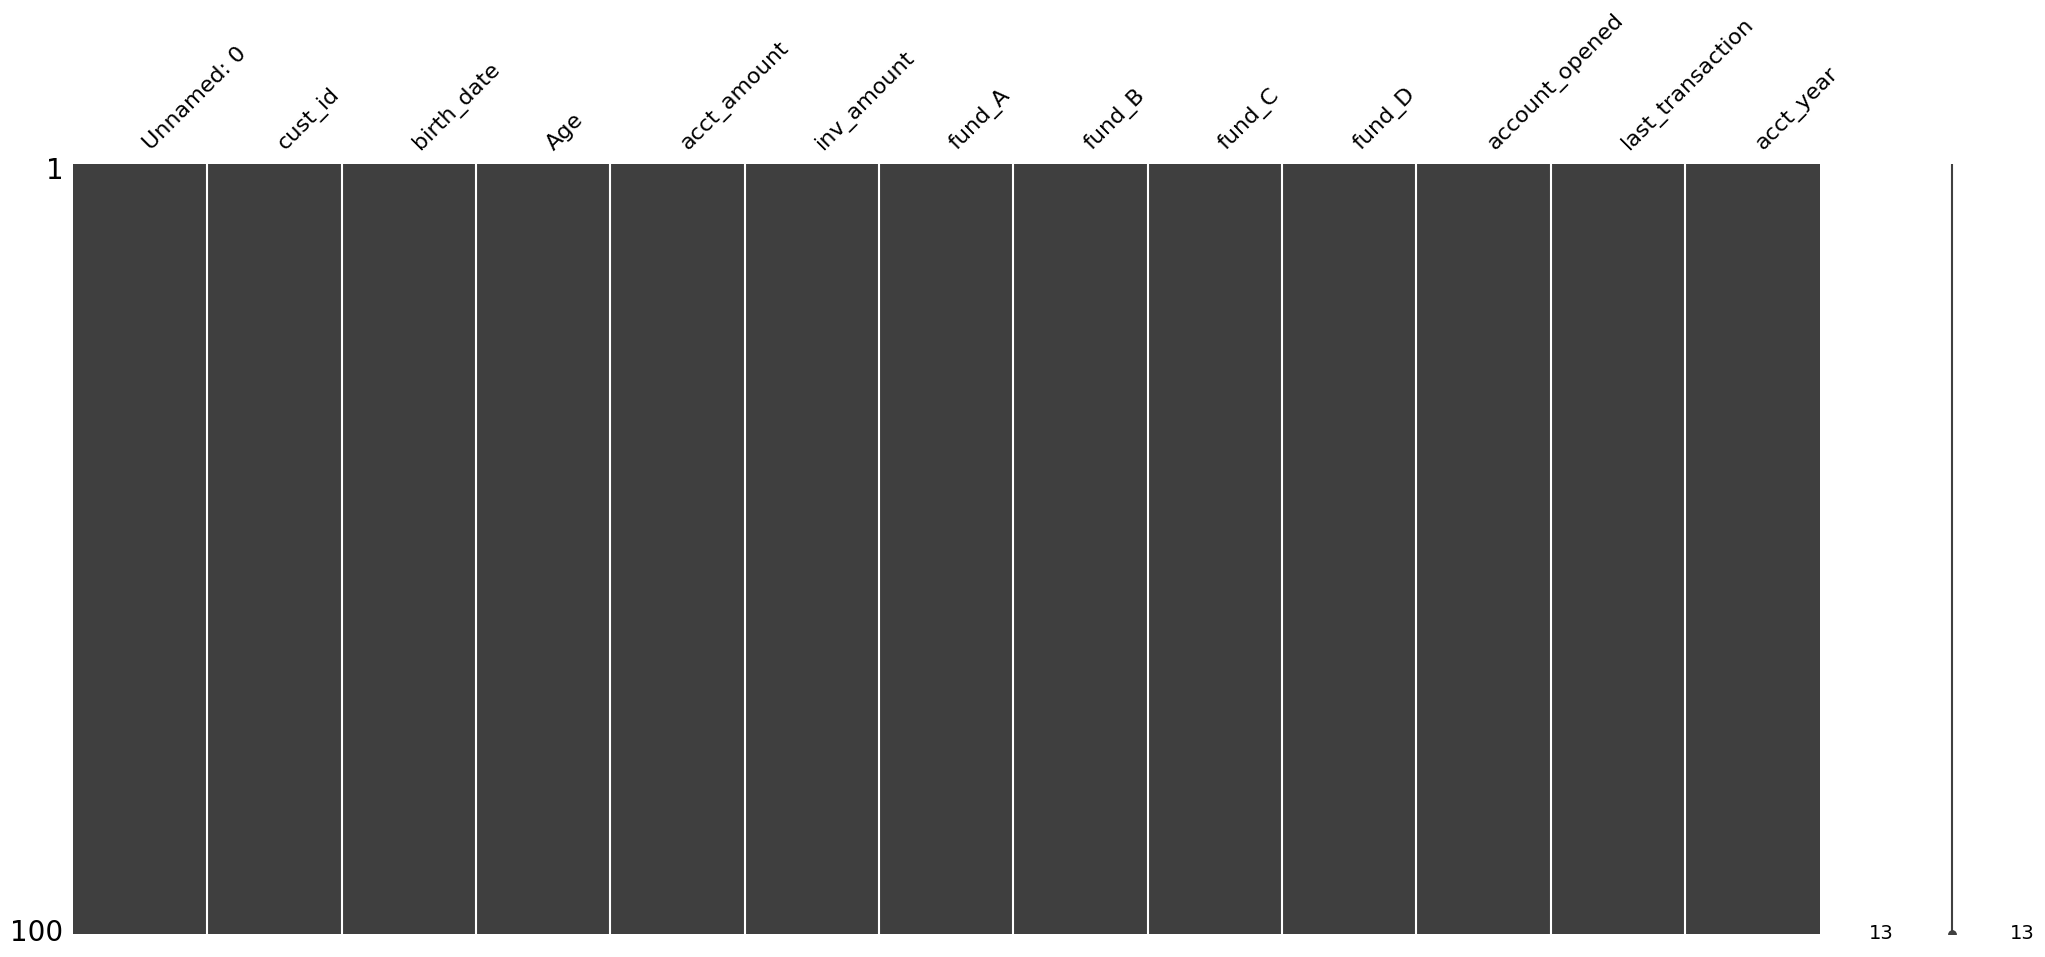

In [ ]:
   # Print number of missing values in banking
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [ ]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values('Age')
msno.matrix(banking_sorted)
plt.show()

## Follow the money

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values('Age')
msno.matrix(banking_sorted)
plt.show()

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
restaurants = pd.read_csv('restaurants_L2.csv')
restaurants.tail()
# Examine the head of the DataFrame
#print(restaurants.head())

,Unnamed: 0,name,addr,city,phone,type
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,334,wu kong,101 spear st.,san francisco,4159579300,asian
335,335,yank sing,427 battery st.,san francisco,4155414949,asian


In [ ]:
pip install fuzzywuzzy

In [ ]:
# Import process from fuzzywuzzy

from fuzzywuzzy import process
restaurants['cuisine_type']=restaurants['type']
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type,cuisine_type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american,american


In [ ]:
restaurants.head()

In [ ]:
# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

In [ ]:
unique_types

array(['american', 'asian', 'italian', 'coffeebar', 'mexican',
       'southwestern', 'steakhouses', 'southern', 'cajun'], dtype=object)

In [ ]:
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('italian', 67), ('american', 62), ('mexican', 50), ('cajun', 40), ('southwestern', 36), ('southern', 31), ('coffeebar', 26), ('steakhouses', 25)]
[('american', 100), ('mexican', 80), ('cajun', 68), ('asian', 62), ('italian', 53), ('southwestern', 41), ('southern', 38), ('coffeebar', 24), ('steakhouses', 21)]
[('italian', 100), ('asian', 67), ('mexican', 43), ('american', 40), ('cajun', 33), ('southern', 27), ('southwestern', 26), ('steakhouses', 26), ('coffeebar', 12)]


In [ ]:
categories = ['asian', 'american', 'italian']

# For each correct cuisine_type in categories
for cuisine in categories:
  # Find matches in cuisine_type of restaurants
  matches = process.extract(cuisine, restaurants['cuisine_type'],
                 limit = restaurants.shape[0])

  # For each possible_match with similarity score >= 80
  for possible_match in matches:
    if possible_match[1] >= 80:
      # Find matching cuisine type
      matching_cuisine = restaurants['cuisine_type'] == possible_match[0]
      restaurants.loc[matching_cuisine, 'cuisine_type'] = cuisine

# Print unique values to confirm mapping
print(restaurants['cuisine_type'].unique())

['american' 'asian' 'italian' 'coffeebar' 'southwestern' 'steakhouses'
 'southern' 'cajun']


In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - Assuming these are your actual column names
# If the column names are different in your DataFrames, update them accordingly
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name - Assuming this is your actual column name
# If the column name is different in your DataFrames, update it accordingly
comp_cl.string('rest_name', 'rest_name', label='name', threshold=0.8)

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)